<a href="https://colab.research.google.com/github/nikhilchakravartula/Tensorflow/blob/master/MNIST_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this project is to get myself familiarized with tensorflow.

In [0]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

Getting along with the dataset...


Shape of train:  (60000, 28, 28)
Shape of test:  (10000, 28, 28)
Count of labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Y label one hot sample:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


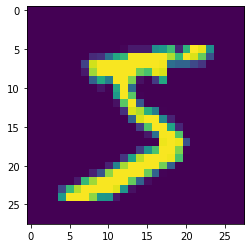

In [25]:
(X_train,Y_train),(X_test,Y_test) =  tf.keras.datasets.mnist.load_data()
print("Shape of train: ",X_train.shape)
print("Shape of test: ",X_test.shape)

#Count number of samples in each class
unique, counts = np.unique(Y_train, return_counts = True)

print("Count of labels:", dict(zip(unique,counts)))
plt.imshow(X_train[0])

#Convert labels to one-hot
Y_train = tf.keras.utils.to_categorical(Y_train,num_classes=len(unique))
Y_test = tf.keras.utils.to_categorical(Y_test,num_classes=len(unique))
print("Y label one hot sample: ",Y_train[0])


Normalize the data.

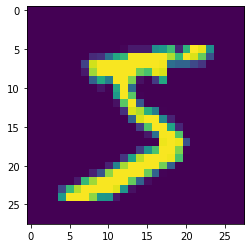

In [15]:
X_train = X_train/255.
X_test  = X_test/255.
plt.imshow(X_train[0])

Building the model

In [38]:
row = 1
col=2
num_classes = len(unique)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (X_train.shape[row],X_train.shape[col])),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes,activation="softmax")
  ]
)

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
train_metrics  = model.fit(X_train,Y_train,batch_size = 64,epochs=15,validation_data=(X_test,Y_test))


Epoch 1/15
938/938 [==============================] - 3s 3ms/step - loss: 3.2243 - accuracy: 0.6552 - val_loss: 0.5032 - val_accuracy: 0.8640
Epoch 2/15
938/938 [==============================] - 3s 3ms/step - loss: 0.7125 - accuracy: 0.8052 - val_loss: 0.3472 - val_accuracy: 0.8994
Epoch 3/15
938/938 [==============================] - 3s 3ms/step - loss: 0.4967 - accuracy: 0.8618 - val_loss: 0.2809 - val_accuracy: 0.9241
Epoch 4/15
938/938 [==============================] - 3s 3ms/step - loss: 0.3975 - accuracy: 0.8907 - val_loss: 0.2295 - val_accuracy: 0.9383
Epoch 5/15
938/938 [==============================] - 3s 3ms/step - loss: 0.3320 - accuracy: 0.9085 - val_loss: 0.2122 - val_accuracy: 0.9417
Epoch 6/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2825 - accuracy: 0.9230 - val_loss: 0.1729 - val_accuracy: 0.9545
Epoch 7/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2593 - accuracy: 0.9282 - val_loss: 0.1569 - val_accuracy: 0.9602
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


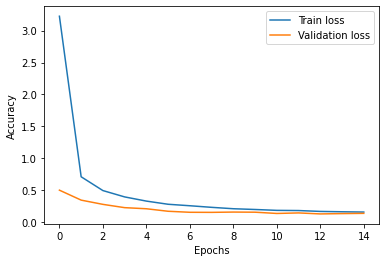

313/313 [==============================] - 0s 1ms/step - loss: 0.1403 - accuracy: 0.9664


[0.1402750313282013, 0.9664000272750854]

In [39]:
print(train_metrics.history.keys())
plt.plot(train_metrics.history['loss'])
plt.plot(train_metrics.history['val_loss'])
plt.plot()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train loss','Validation loss'])
plt.show()
model.evaluate(X_test,Y_test)

 **LEARNINGS:**
1.   unique , counts  = np.unique(X,return_counts=True)
2.   Zip(iterator1,iterator2,...) returns an iterator that has corresponding elements from the iterators.
2.   One-Hot Keras: tf.keras.utils.to_categorical( Y, num_classes=10 )
3.   Keras Flatten(input_shape=(,,,))
4.   fit() will return a history object. history.history is a dict that contains all the metrics that were specified during model compilation. History.history.keys()




